In [1]:
import copy
from glob import glob

from PIL import Image

file_paths = []
ellipse_data = []

label_files = glob("../data/FDDB/labels/*.txt")

for filename in label_files:
    with open(filename) as f:
        if "ellipseList" not in filename:
            file_paths += [p.strip("\n") for p in f.readlines()]
        else:
            ellipse_data += [p.strip("\n") for p in f.readlines()]

ellipse_data

['2002/08/31/big/img_18008',
 '4',
 '53.968100 38.000000 -1.494904 31.598276 55.596600  1',
 '56.000000 37.000000 -1.460399 202.152999 122.034200  1',
 '54.558400 39.000000 1.396263 293.611040 133.853600  1',
 '44.000000 34.000000 -1.442216 391.131100 168.266900  1',
 '2002/08/22/big/img_249',
 '1',
 '92.731568 55.547794 1.319755 133.877336 101.823201  1',
 '2002/08/17/big/img_971',
 '1',
 '73.807599 47.820400 1.556528 137.374900 145.992100  1',
 '2002/08/04/big/img_308',
 '1',
 '78.375618 54.074240 -1.347086 161.597152 89.852468  1',
 '2002/07/28/big/img_362',
 '1',
 '106.976501 71.634519 -1.425279 166.915021 130.730227  1',
 '2002/08/12/big/img_142',
 '1',
 '49.770719 31.683800 1.369907 216.648600 134.939648  1',
 '2002/08/26/big/img_61',
 '1',
 '157.265776 98.935500 1.566882 145.923700 200.274990  1',
 '2002/08/14/big/img_422',
 '1',
 '74.310499 46.935338 1.424213 117.556220 84.527074  1',
 '2002/07/19/big/img_607',
 '2',
 '56.415811 37.556526 1.570796 131.466396 120.263734  1',
 '4

In [2]:
import pandas as pd

In [3]:
pdf_file_paths = pd.DataFrame({"path": file_paths})
pdf_file_paths["path_idx"] = pdf_file_paths.index

pdf_ellipse_data = pd.DataFrame({"data": ellipse_data})
pdf_ellipse_data["data_idx"] = pdf_ellipse_data.index

In [4]:
pdf_file_data_mapping = pdf_file_paths.merge(pdf_ellipse_data, left_on="path", right_on="data", how="left")

In [5]:
ellipse_dict = {str(k): [] for k in pdf_file_paths["path"]}
ellipse_dict

{'2002/08/31/big/img_18008': [],
 '2002/08/22/big/img_249': [],
 '2002/08/17/big/img_971': [],
 '2002/08/04/big/img_308': [],
 '2002/07/28/big/img_362': [],
 '2002/08/12/big/img_142': [],
 '2002/08/26/big/img_61': [],
 '2002/08/14/big/img_422': [],
 '2002/07/19/big/img_607': [],
 '2003/01/15/big/img_717': [],
 '2002/08/01/big/img_1475': [],
 '2002/08/29/big/img_19061': [],
 '2003/01/01/big/img_346': [],
 '2002/07/20/big/img_315': [],
 '2003/01/15/big/img_756': [],
 '2002/08/15/big/img_879': [],
 '2002/08/08/big/img_615': [],
 '2003/01/13/big/img_431': [],
 '2002/08/05/big/img_3233': [],
 '2002/08/24/big/img_526': [],
 '2003/01/13/big/img_717': [],
 '2002/09/01/big/img_16408': [],
 '2002/07/22/big/img_217': [],
 '2002/07/31/big/img_960': [],
 '2002/08/21/big/img_610': [],
 '2002/08/05/big/img_3753': [],
 '2002/08/03/big/img_151': [],
 '2002/08/21/big/img_267': [],
 '2002/08/01/big/img_2175': [],
 '2002/08/04/big/img_556': [],
 '2002/08/21/big/img_527': [],
 '2002/09/02/big/img_15800': [

In [6]:
for i, r in pdf_file_data_mapping.iterrows():
    data_idx = r["data_idx"]
    num_ellipses = int(ellipse_data[data_idx + 1])
    file_path = r["path"]
    for j in range(data_idx + 2, data_idx + num_ellipses + 2):
        ellipse_dict[file_path].append([float(v) for v in ellipse_data[j].split(" ")[:-1] if len(v)>0])

In [21]:
import torch

ellipse_dict['2003/01/14/big/img_1115']

[[60.90127, 40.951352, 1.567295, 162.957324, 240.657952]]

In [8]:
import numpy as np
import matplotlib.pyplot as plt

img_name = "2002/07/19/big/img_392"

img = Image.open(f"../data/FDDB/images/{img_name}.jpg")
img_array = np.array(img)

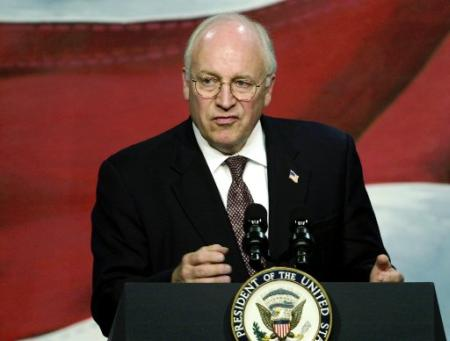

In [9]:
img

ValueError: not enough values to unpack (expected 6, got 5)

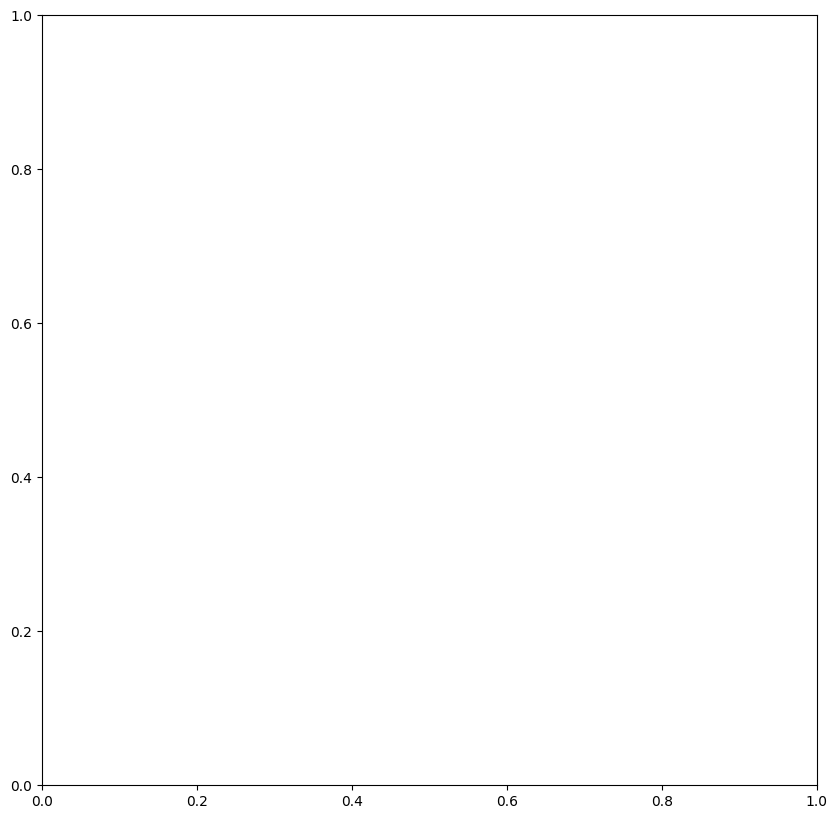

In [10]:
from matplotlib.collections import EllipseCollection

fig, ax = plt.subplots(figsize=(10, 10))
for ed in ellipse_dict[img_name]:
    major_axis_radius, minor_axis_radius, angle, center_x, center_y, _ = ed

    ec = EllipseCollection(major_axis_radius*2, minor_axis_radius*2, np.degrees(angle), units='xy', offsets=(center_x, center_y),
                               transOffset=ax.transData, facecolors="None")
    ax.add_collection(ec)
ax.imshow(img, cmap="gray")

In [ ]:
from ellipse_rcnn.utils.viz import DetectionPlotter

In [ ]:
major_axis_radius, minor_axis_radius, angle, center_x, center_y, _ = ed
DetectionPlotter.from_ellipses(ed)

In [ ]:
import torch

torch.tensor(ed)

In [28]:
from ellipse_rcnn.utils.data.fddb import FDDB

ds = FDDB("../data/FDDB/")

(tensor([[[ 1.3927,  1.3927,  1.3927,  ...,  0.8618,  0.8618,  0.9132],
          [ 1.3927,  1.3927,  1.3927,  ...,  0.8618,  0.8447,  0.9646],
          [ 1.3927,  1.3927,  1.3927,  ...,  0.8447,  0.8104,  0.8104],
          ...,
          [ 0.1083, -0.0458, -0.2513,  ..., -1.2103, -1.1760, -1.0390],
          [ 0.1768,  0.0912, -0.0287,  ..., -1.3987, -1.4158, -1.2959],
          [ 0.2453,  0.1426,  0.0398,  ..., -1.4158, -1.4329, -1.3130]],
 
         [[ 1.2556,  1.2556,  1.2556,  ..., -1.4930, -1.4930, -1.4405],
          [ 1.2556,  1.2556,  1.2556,  ..., -1.4930, -1.4755, -1.3704],
          [ 1.2556,  1.2556,  1.2556,  ..., -1.4755, -1.4580, -1.5105],
          ...,
          [-0.1450, -0.3025, -0.5126,  ..., -1.2654, -1.2304, -1.0903],
          [-0.0924, -0.1625, -0.2850,  ..., -1.4230, -1.4405, -1.3179],
          [-0.0224, -0.1275, -0.2325,  ..., -1.4055, -1.4230, -1.3179]],
 
         [[ 1.0191,  1.0191,  1.0191,  ..., -1.3687, -1.4036, -1.3513],
          [ 1.0191,  1.0191,